In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("final_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     7500 non-null   object 
 1   city          7500 non-null   object 
 2   day_night     7500 non-null   object 
 3   humidity      7373 non-null   float64
 4   wind_speed    7500 non-null   float64
 5   pressure      7500 non-null   float64
 6   temperature   7388 non-null   float64
 7   weather_type  7500 non-null   object 
dtypes: float64(4), object(4)
memory usage: 468.9+ KB


In [3]:
df.shape

(7500, 8)

In [4]:
df.head()

,timestamp,city,day_night,humidity,wind_speed,pressure,temperature,weather_type
0,2023-01-01 00:00:00,New York,Day,98.521429,15.979909,1001.973170,19.092130,Rainy
1,2023-01-01 00:30:00,Phoenix,Day,78.033450,7.080726,995.411690,4.699099,Snowy
2,2023-01-01 01:00:00,Chicago,Night,25.502135,3.042422,1017.871346,29.319450,Sunny
3,2023-01-01 01:30:00,Houston,Night,28.764339,3.663618,1016.841050,32.851760,Sunny
4,2023-01-01 02:00:00,Phoenix,Day,51.393512,11.075449,1007.557862,20.520413,Cloudy


In [5]:
df.describe()

,humidity,wind_speed,pressure,temperature
count,7373.000000,7500.000000,7500.000000,7388.000000
mean,64.993569,9.901248,1006.751185,21.106448
std,22.707404,6.996785,11.749965,9.932327
min,20.002808,0.006225,970.004872,-4.998423
25%,44.865877,5.310309,999.520786,19.236081
50%,70.824517,8.458950,1009.036326,22.978858
75%,83.445878,13.283046,1015.496588,27.374931
max,99.998020,34.956417,1024.987681,34.986173


In [6]:
df.isnull().sum()

timestamp         0
city              0
day_night         0
humidity        127
wind_speed        0
pressure          0
temperature     112
weather_type      0
dtype: int64

In [7]:
print(df['weather_type'].value_counts())
print(df['city'].value_counts())
print(df['day_night'].value_counts())

weather_type
Sunny     2257
Rainy     1910
Cloudy    1501
Snowy     1119
Stormy     713
Name: count, dtype: int64
city
Chicago        1536
New York       1527
Houston        1507
Phoenix        1475
Los Angeles    1455
Name: count, dtype: int64
day_night
Night    3829
Day      3671
Name: count, dtype: int64


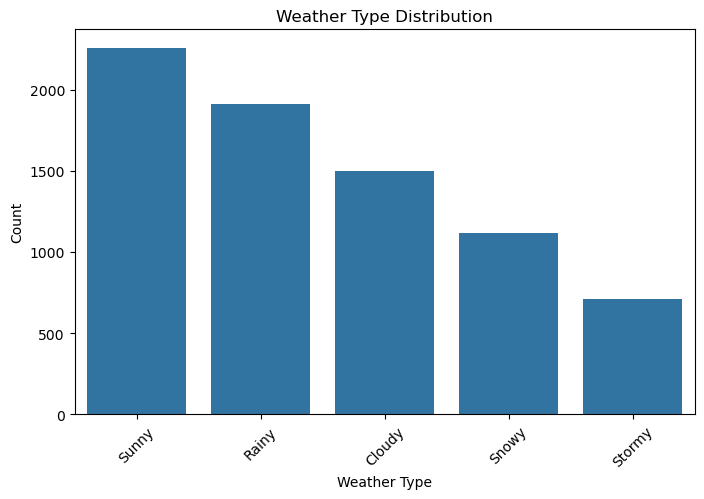

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='weather_type', order=df['weather_type'].value_counts().index)
plt.title("Weather Type Distribution")
plt.xlabel("Weather Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

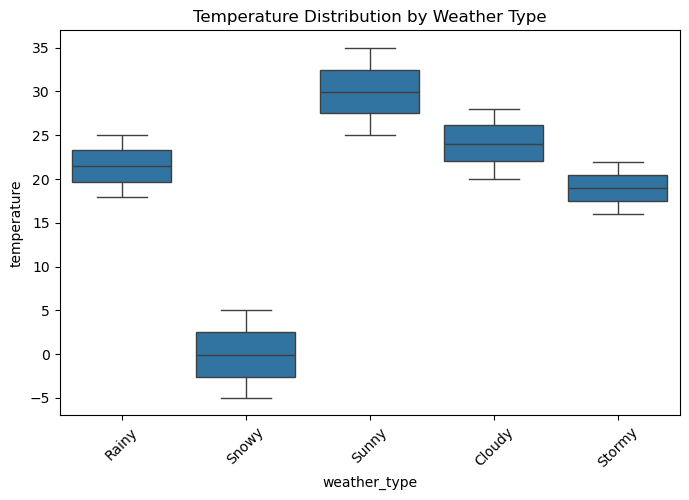

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='weather_type', y='temperature')
plt.title("Temperature Distribution by Weather Type")
plt.xticks(rotation=45)
plt.show()

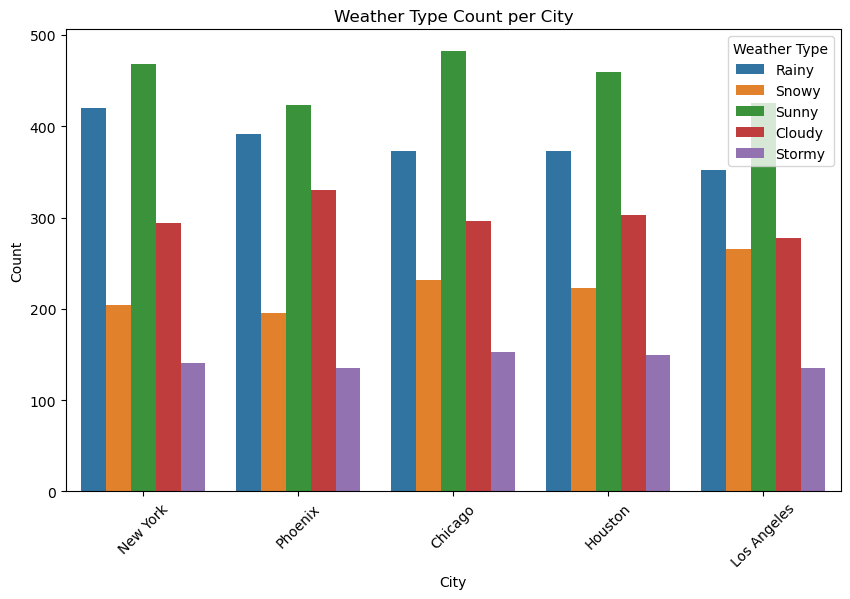

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='city', hue='weather_type')
plt.title("Weather Type Count per City")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Weather Type')
plt.show()

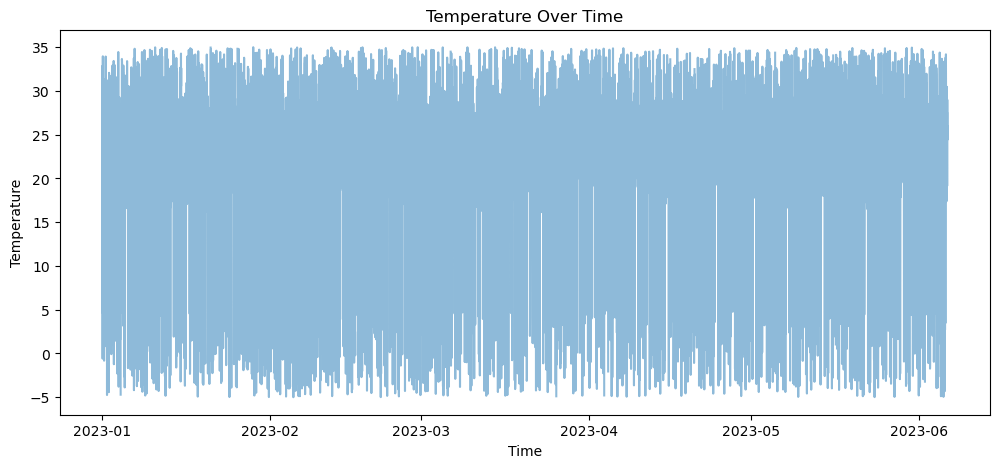

In [11]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

plt.figure(figsize=(12, 5))
plt.plot(df['timestamp'], df['temperature'], alpha=0.5)
plt.title("Temperature Over Time")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.show()

In [12]:
df['humidity'] = df.groupby('weather_type')['humidity'].transform(lambda x: x.fillna(x.mean()))
df['temperature'] = df.groupby('weather_type')['temperature'].transform(lambda x: x.fillna(x.mean()))

print(df.isnull().sum())

timestamp       0
city            0
day_night       0
humidity        0
wind_speed      0
pressure        0
temperature     0
weather_type    0
dtype: int64


In [13]:
df.dropna(inplace=True)

In [14]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [15]:
df['weather_type'] = df['weather_type'].str.strip().str.title()
df['city'] = df['city'].str.strip().str.title()
df['day_night'] = df['day_night'].str.strip().str.title()

In [16]:
df

,timestamp,city,day_night,humidity,wind_speed,pressure,temperature,weather_type
0,2023-01-01 00:00:00,New York,Day,98.521429,15.979909,1001.973170,19.092130,Rainy
1,2023-01-01 00:30:00,Phoenix,Day,78.033450,7.080726,995.411690,4.699099,Snowy
2,2023-01-01 01:00:00,Chicago,Night,25.502135,3.042422,1017.871346,29.319450,Sunny
3,2023-01-01 01:30:00,Houston,Night,28.764339,3.663618,1016.841050,32.851760,Sunny
4,2023-01-01 02:00:00,Phoenix,Day,51.393512,11.075449,1007.557862,20.520413,Cloudy
...,...,...,...,...,...,...,...,...
7495,2023-06-06 03:30:00,Houston,Day,39.851526,6.211555,1022.778880,27.554341,Sunny
7496,2023-06-06 04:00:00,Los Angeles,Day,89.117191,16.561761,982.449225,19.144085,Stormy
7497,2023-06-06 04:30:00,Phoenix,Night,41.160128,1.357395,1011.342080,28.986071,Sunny
7498,2023-06-06 05:00:00,Chicago,Day,87.610113,13.652968,1009.562196,24.410478,Rainy


In [17]:
df['wind_speed'] = df['wind_speed'].clip(0, 40)
df['humidity'] = df['humidity'].clip(0, 100)

In [18]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     7500 non-null   datetime64[ns]
 1   city          7500 non-null   object        
 2   day_night     7500 non-null   object        
 3   humidity      7500 non-null   float64       
 4   wind_speed    7500 non-null   float64       
 5   pressure      7500 non-null   float64       
 6   temperature   7500 non-null   float64       
 7   weather_type  7500 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 468.9+ KB


,timestamp,humidity,wind_speed,pressure,temperature
count,7500,7500.000000,7500.000000,7500.000000,7500.000000
mean,2023-03-20 02:45:00,65.003487,9.901248,1006.751185,21.090683
min,2023-01-01 00:00:00,20.002808,0.006225,970.004872,-4.998423
25%,2023-02-09 01:22:30,44.797861,5.310309,999.520786,19.223228
50%,2023-03-20 02:45:00,70.848027,8.458950,1009.036326,22.986508
75%,2023-04-28 04:07:30,83.587082,13.283046,1015.496588,27.390479
max,2023-06-06 05:30:00,99.998020,34.956417,1024.987681,34.986173
std,NaN,22.683944,6.996785,11.749965,9.947622


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, r2_score

In [33]:
df_class = df.copy()
df_class.to_csv("final_dataset_Insights.csv", index=False)

le_weather = LabelEncoder()
df_class['weather_type_encoded'] = le_weather.fit_transform(df_class['weather_type'])

df_class['city_encoded'] = LabelEncoder().fit_transform(df_class['city'])
df_class['day_night_encoded'] = LabelEncoder().fit_transform(df_class['day_night'])

In [34]:
df_class

,timestamp,city,day_night,humidity,wind_speed,pressure,temperature,weather_type,weather_type_encoded,city_encoded,day_night_encoded
0,2023-01-01 00:00:00,New York,Day,98.521429,15.979909,1001.973170,19.092130,Rainy,1,3,0
1,2023-01-01 00:30:00,Phoenix,Day,78.033450,7.080726,995.411690,4.699099,Snowy,2,4,0
2,2023-01-01 01:00:00,Chicago,Night,25.502135,3.042422,1017.871346,29.319450,Sunny,4,0,1
3,2023-01-01 01:30:00,Houston,Night,28.764339,3.663618,1016.841050,32.851760,Sunny,4,1,1
4,2023-01-01 02:00:00,Phoenix,Day,51.393512,11.075449,1007.557862,20.520413,Cloudy,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...
7495,2023-06-06 03:30:00,Houston,Day,39.851526,6.211555,1022.778880,27.554341,Sunny,4,1,0
7496,2023-06-06 04:00:00,Los Angeles,Day,89.117191,16.561761,982.449225,19.144085,Stormy,3,2,0
7497,2023-06-06 04:30:00,Phoenix,Night,41.160128,1.357395,1011.342080,28.986071,Sunny,4,4,1
7498,2023-06-06 05:00:00,Chicago,Day,87.610113,13.652968,1009.562196,24.410478,Rainy,1,0,0


In [35]:
features_class = ['humidity', 'wind_speed', 'pressure', 'temperature', 'city_encoded', 'day_night_encoded']
X = df_class[features_class]
y = df_class['weather_type_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [37]:
y_pred = clf.predict(X_test)

In [38]:
acc = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", round(acc * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_weather.classes_))

Classification Accuracy: 98.47 %

Classification Report:
               precision    recall  f1-score   support

      Cloudy       0.97      0.97      0.97       311
       Rainy       0.96      0.98      0.97       378
       Snowy       1.00      1.00      1.00       208
      Stormy       1.00      0.96      0.98       137
       Sunny       1.00      1.00      1.00       466

    accuracy                           0.98      1500
   macro avg       0.99      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



In [39]:
features_reg = ['humidity', 'wind_speed', 'pressure', 'city_encoded', 'day_night_encoded']
target_reg = 'temperature'

Xr = df_class[features_reg]
yr = df_class[target_reg]

Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)

In [40]:
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)
mae = mean_absolute_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)
print("Mean Absolute Error (MAE):", round(mae, 2))
print("R² Score:", round(r2, 4))

Mean Absolute Error (MAE): 3.37
R² Score: 0.7163


In [41]:
import joblib

joblib.dump(clf, 'weather_classifier.pkl')
joblib.dump(reg, 'temperature_regressor.pkl')
joblib.dump(le_weather, 'label_encoder.pkl')

['label_encoder.pkl']

In [42]:
df_class

,timestamp,city,day_night,humidity,wind_speed,pressure,temperature,weather_type,weather_type_encoded,city_encoded,day_night_encoded
0,2023-01-01 00:00:00,New York,Day,98.521429,15.979909,1001.973170,19.092130,Rainy,1,3,0
1,2023-01-01 00:30:00,Phoenix,Day,78.033450,7.080726,995.411690,4.699099,Snowy,2,4,0
2,2023-01-01 01:00:00,Chicago,Night,25.502135,3.042422,1017.871346,29.319450,Sunny,4,0,1
3,2023-01-01 01:30:00,Houston,Night,28.764339,3.663618,1016.841050,32.851760,Sunny,4,1,1
4,2023-01-01 02:00:00,Phoenix,Day,51.393512,11.075449,1007.557862,20.520413,Cloudy,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...
7495,2023-06-06 03:30:00,Houston,Day,39.851526,6.211555,1022.778880,27.554341,Sunny,4,1,0
7496,2023-06-06 04:00:00,Los Angeles,Day,89.117191,16.561761,982.449225,19.144085,Stormy,3,2,0
7497,2023-06-06 04:30:00,Phoenix,Night,41.160128,1.357395,1011.342080,28.986071,Sunny,4,4,1
7498,2023-06-06 05:00:00,Chicago,Day,87.610113,13.652968,1009.562196,24.410478,Rainy,1,0,0


In [43]:
!pip install requests


In [44]:
import requests

def get_weatherapi_data(location, api_key):
    url = f"http://api.weatherapi.com/v1/current.json?key={api_key}&q={location}"
    response = requests.get(url)
    data = response.json()

    
    features = {
        "humidity": data["current"]["humidity"],
        "wind_speed": data["current"]["wind_kph"],
        "pressure": data["current"]["pressure_mb"],
        "temperature": data["current"]["temp_c"],
        "city_encoded": 0, 
        "day_night_encoded": 1,  
    }

    return features


In [45]:
from joblib import dump

dump(clf, 'random_forest_model.joblib')



['random_forest_model.joblib']

In [54]:
# CNN Radar Image Classifier - Training Section
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Setup
img_height, img_width = 128, 128
batch_size = 32
num_classes = 4  # ['Clear', 'Rain', 'Storm', 'Cloudy']

# Image directory must be structured as: radar_images/train/Clear, /Rain, etc.
train_data_dir = 'radar_images/train'

datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Build CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(train_generator, validation_data=val_generator, epochs=10)

# Save the model for use in Streamlit
cnn_model.save('radar_cnn_model.h5')


Found 164 images belonging to 4 classes.
Found 40 images belonging to 4 classes.
Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 499ms/step - accuracy: 0.6393 - loss: 0.8141 - val_accuracy: 1.0000 - val_loss: 0.3430
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 380ms/step - accuracy: 0.8645 - loss: 0.3024 - val_accuracy: 0.7500 - val_loss: 0.3225
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 379ms/step - accuracy: 0.8341 - loss: 0.3219 - val_accuracy: 1.0000 - val_loss: 0.2211
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 345ms/step - accuracy: 1.0000 - loss: 0.1839 - val_accuracy: 1.0000 - val_loss: 0.0635
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 353ms/step - accuracy: 1.0000 - loss: 0.0415 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 353ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 5.5382e-04
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 353ms/step - accuracy: 1.0000 - loss: 3.4105e-04 - val_accuracy: 1.0000 - val_loss: 1.3253e-04
Epoch 8/10
6/6 ━━━━━━━━━━

In [53]:
!pip install tensorflow

In [55]:
!pip install --upgrade tensorflow